In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install mysql-connector-python

   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB 435.7 kB/s eta 0:00:33
   ---------------------------------------- 0.1/14.3 MB 558.5 kB/s eta 0:00:26
   ---------------------------------------- 0.1/14.3 MB 853.3 kB/s eta 0:00:17
    --------------------------------------- 0.2/14.3 MB 1.1 MB/s eta 0:00:13
   - -------------------------------------- 0.4/14.3 MB 1.8 MB/s eta 0:00:08
   -- ------------------------------------- 0.7/14.3 MB 2.6 MB/s eta 0:00:06
   --- ------------------------------------ 1.1/14.3 MB 3.3 MB/s eta 0:00:04
   --- ------------------------------------ 1.4/14.3 MB 3.8 MB/s eta 0:00:04
   ----- ---------------------------------- 1.9/14.3 MB 4.5 MB/s eta 0:00:03
   ------ --------------------------------- 2.2/14.3 MB 4.6 MB/s eta 0:00:03
   ------- -------------------------------- 2.7/14.3 MB 5.3 MB/s eta 0:00:03
   ----


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
 pip install matplotlib


     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.9 kB ? eta -:--:--
     --------- --------------------------- 41.0/165.9 kB 487.6 kB/s eta 0:00:01
     -------------------- ---------------- 92.2/165.9 kB 871.5 kB/s eta 0:00:01
     -------------------------------------  163.8/165.9 kB 1.1 MB/s eta 0:00:01
     ------------------------------------ 165.9/165.9 kB 997.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.0 MB 2.3 MB/s eta 0:00:04
    --------------------------------------- 0.2/8.0 MB 2.1 MB/s eta 0:00:04
   - -------------------------------------- 0.3/8.0 MB 2.3 MB/s eta 0:00:04
   - -------------------------------------- 0.3/8.0 MB 2.2 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/8.0 MB 2.3 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/8.0 MB 2.2 MB/s eta 0:00:04
   --- 


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/294.9 kB 651.6 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 798.9 kB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.9 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv','order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='12345',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'E:/Projects/DBMS + PYTHON/E-Commerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close() 

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "12345",
                             database = "ecommerce")

cur = db.cursor() 

In [25]:
#List all unique cities where customers are located.
query = "select distinct customer_city from customers"

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


In [11]:
#Count the number of orders placed in 2017.

query = "select count(order_id) from orders where year(order_purchase_timestamp) = 2017"

cur.execute(query)

data = cur.fetchall()

"Total order placed in 2017 = ",data[0][0]  

('Total order placed in 2017 = ', 45101)

In [14]:
#Find the total sales per category.

query = """select upper(products.product_category) category, 
round(sum(payments.payment_value),2) sales from products 
join order_items on products.product_id = order_items.product_id 
join payments on payments.order_id = order_items.order_id group by category"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Category","Sales"])
df

,Category,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


In [15]:
 #Calculate the percentage of orders that were paid in installments.
query = "select (sum(case when payment_installments >= 1 then 1 else 0 end))/count(*)*100 from payments"

cur.execute(query)

data = cur.fetchall()
data

[(Decimal('99.9981'),)]

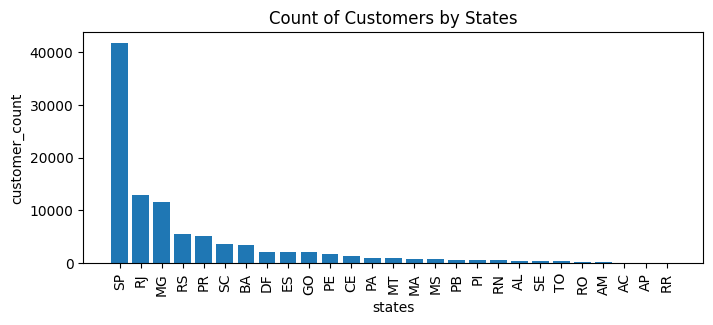

In [32]:
#Count the number of customers from each state.
query = "select customer_state, count(customer_id) from customers group by customer_state"

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["states","customer_count"])
df = df.sort_values(by = "customer_count", ascending = False)

plt.figure(figsize = (8,3))
plt.bar(df["states"],df["customer_count"])
plt.xticks(rotation=90)
plt.xlabel("states")
plt.ylabel("customer_count")
plt.title("Count of Customers by States")
plt.show()

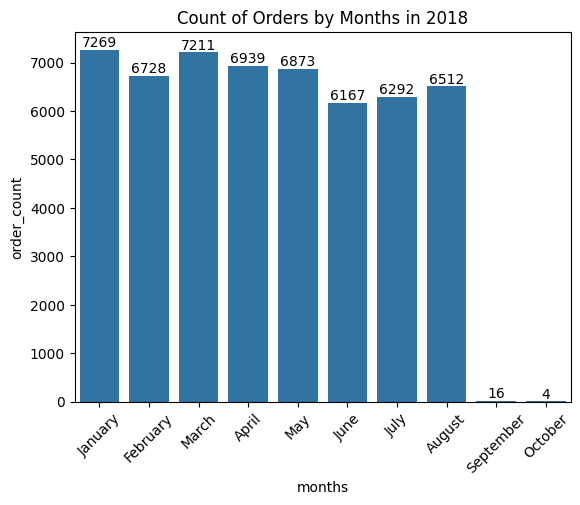

In [34]:
#Calculate the number of orders per month in 2018.

query = """select monthname(order_purchase_timestamp) months, count(order_id) 
order_count from orders where year(order_purchase_timestamp) = 2018 group by months"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["months","order_count"])
o = ["January","February","March","April","May","June","July","August","September","October"] 
ax = sns.barplot(x = df["months"],y = df["order_count"],data = df, order = o)
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.title("Count of Orders by Months in 2018")
plt.show()

In [43]:
#Find the average number of products per order, grouped by customer city.
query = """with count_per_order as 
(select orders.order_id, orders.customer_id,count(order_items.order_id) as oc
from orders join order_items 
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city,round( avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns = ["customer city","average products/orders"])
df.head(10)

,customer city,average products/orders
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
5,cidelandia,4.00
6,picarra,4.00
7,morro de sao paulo,4.00
8,teixeira soares,4.00
9,curralinho,4.00


In [55]:
#Calculate the percentage of total revenue contributed by each product category.

query = """(select upper(products.product_category) category, 
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) 
sales_percentage from products 
join order_items on products.product_id = order_items.product_id 
join payments on payments.order_id = order_items.order_id group by category)
order by sales_percentage desc"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category","Percent Distribution"])
df.head(5)

,Category,Percent Distribution
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93


In [61]:
#Identify the correlation between product price and the number of times a product has been purchased.

query = """select products.product_category, count(order_items.product_id),
round(avg(order_items.price),2) from products join order_items
on products.product_id = order_items.product_id
group by products.product_category"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category","order_count","price"])

arr1 = df["order_count"]
arr2 = df["price"]

a = np.corrcoef([arr1,arr2])
print("The correlation is",a[0][-1])

The correlation is -0.10631514167157562


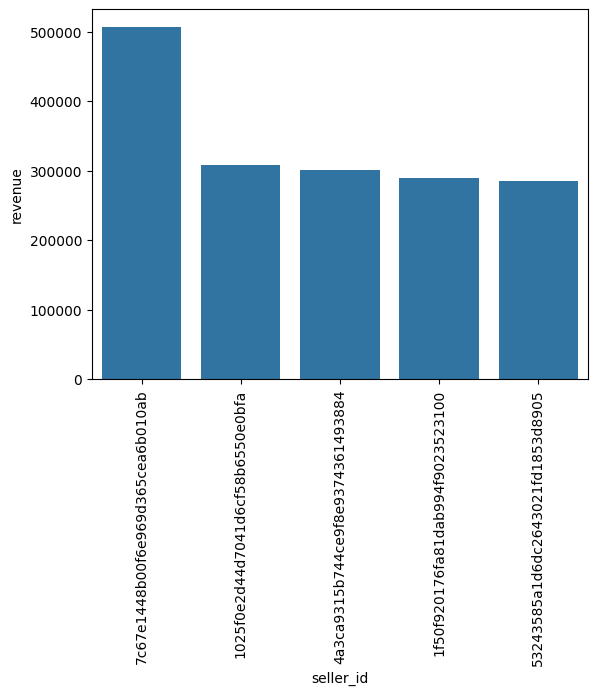

In [63]:
#Calculate the total revenue generated by each seller, and rank them by revenue.

query = """select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value) 
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["seller_id","revenue","rank"])
df = df.head()
sns.barplot(x = "seller_id", y = "revenue", data = df)
plt.xticks(rotation = 90)
plt.show()